In [6]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [7]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return " ".join(filtered_tokens)

preprocess("Thor ate pizza")

'Thor eat pizza'

In [9]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [11]:
v = CountVectorizer(ngram_range=(1,2))

v.fit(corpus_processed)

v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [12]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [13]:
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [14]:
#News category classification problem

import pandas as pd

df = pd.read_json('news_dataset.json')
print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [15]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [18]:
min_samples = 1381

df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [24]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()
df_balanced

,text,category
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS
2912,From the Other Side; an Honest Review from Emp...,BUSINESS
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS
502,How to Market Your Business While Traveling th...,BUSINESS
5279,How to Leverage Intuition in Decision-making I...,BUSINESS
...,...,...
2178,Aquarium To Monitor Animals' Behavior Changes ...,SCIENCE
5682,How Google Glass Could Save Lives In The Hospi...,SCIENCE
1643,Honda's Gravity Modification Research For us A...,SCIENCE
11428,EVERYONE Loves Alternative Facts THE POWER OF ...,SCIENCE


In [28]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS':0,
    'SPORTS':1,
    'CRIME':2,
    'SCIENCE':3
})

In [33]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [34]:
df_balanced.text

11967    GCC Business Leaders Remain Confident in the F...
2912     From the Other Side; an Honest Review from Emp...
3408     Mike McDerment, CEO of FreshBooks, Talks About...
502      How to Market Your Business While Traveling th...
5279     How to Leverage Intuition in Decision-making I...
                               ...                        
2178     Aquarium To Monitor Animals' Behavior Changes ...
5682     How Google Glass Could Save Lives In The Hospi...
1643     Honda's Gravity Modification Research For us A...
11428    EVERYONE Loves Alternative Facts THE POWER OF ...
8101     From Cooking to Conservation: Women Take Actio...
Name: text, Length: 5524, dtype: object

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num    
)

In [37]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [41]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,3))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       276
           1       0.96      0.73      0.83       277
           2       0.83      0.87      0.85       276
           3       0.93      0.76      0.83       276

    accuracy                           0.82      1105
   macro avg       0.84      0.82      0.82      1105
weighted avg       0.84      0.82      0.82      1105



In [48]:
X_test[:5]

3716     African Nation Slaps Exxon With Fine Nearly 7 ...
608      These Cringe-Worthy Stories Show It Can Be Har...
11172    LISTEN: The Accidental Discovery That Proved T...
1346     Build Loyalty -- The Cost -- $00.00 Remember y...
1356     Man Killed By Michigan Police Wasn't Targeting...
Name: text, dtype: object

In [49]:
y_test[:5]

3716     0
608      3
11172    3
1346     0
1356     2
Name: category_num, dtype: int64

In [50]:
y_pred[:5]

array([0, 0, 3, 0, 2], dtype=int64)

In [51]:
# Using text pre-processing to remove stop words, punctuations and apply lemmatization
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 


In [52]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,gcc business leader remain confident face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks talk give build ...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage Intuition decision make feel safe rel...


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num    
)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       276
           1       0.93      0.83      0.88       277
           2       0.82      0.92      0.87       276
           3       0.91      0.81      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[241,   9,  16,  10],
       [ 10, 229,  30,   8],
       [ 16,   2, 253,   5],
       [ 39,   5,   8, 224]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

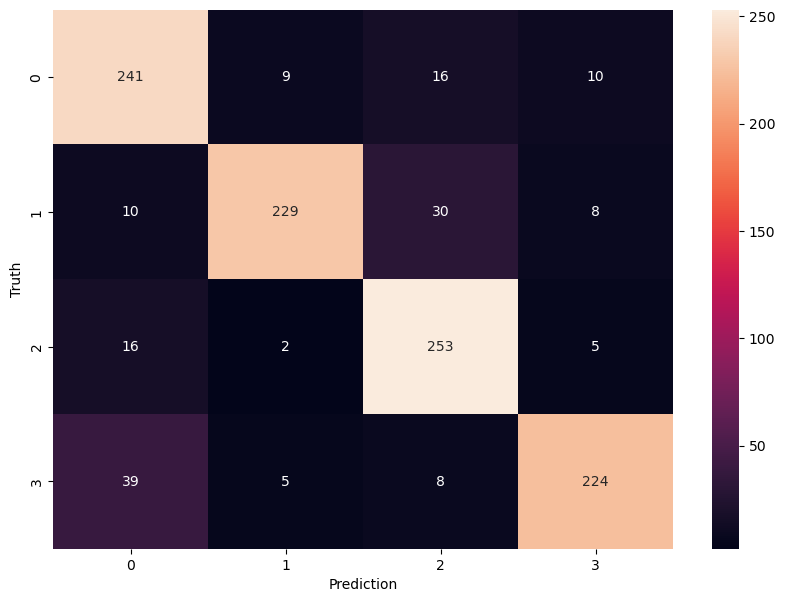

In [56]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')